<a href="https://colab.research.google.com/github/anamarigarzon/IR-Image-Analysis-in-Power-Systems/blob/main/IR_image_analysis_Motor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Thermographic Image Analysis - Motor**

Dataset: https://ieeexplore-ieee-org.ez.urosario.edu.co/document/9349599

In this project Infrared Thermographic Images are processed to identify and classify motor failures.

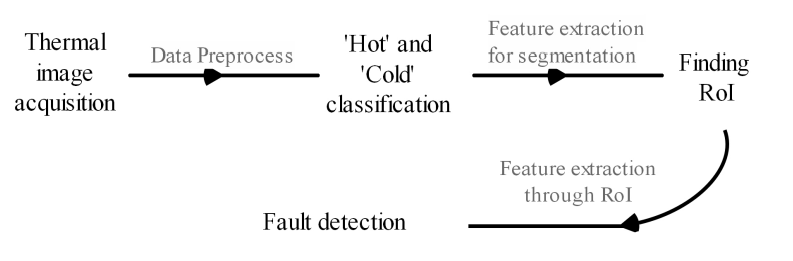


Packages:

In [ ]:
import cv2 # Computer Vision Implementations in Python
import matplotlib.pyplot as plt # Create graphic visualizations in Python
import numpy as np #support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
import pandas as pd
import os 
from google.colab import drive

** **

### **DATA PREPROCESS**

The first step is to get access to the images folder. This project was coded in Google Colab and the images were stored in a personal Google Drive folder. If you wish to execute it you can skip this process as the vectorization is stored in "dataset_motor.csv" that is included in the repository.

In [ ]:
drive.mount("/content/drive") # Access drive folder for Google Colab

Mounted at /content/drive


Now, as the images have the same shape (240x320), we create a dataset that has a first column with the name of the file. The next step is to import the images in BGR space color (by defect in open cv), vectorize them by pixel and add a column with the image data. 

After that, the images are converted to gray and we get the maximum, minimum, mean and standard deviation of the values in gray scale, and we add them to the dataset. Finally, we add the label column.

To add the column with the image data we need to encode and decode the image. vectorizing it, converting it into a string. So next we have the code and decode functions:

In [ ]:
def vectorize_image(image_data):
  image_string = ''
  for i in range(image_data.shape[0]):
    for j in range(image_data.shape[1]):
      for k in range(image_data.shape[2]):
        image_string += str(image_data[i][j][k])+','
  return image_string

def reverse_img_vectorization(image_string, num_rows, num_columns, space_color_dim):
  img_list = image_string.split(',')
  count = 0
  image_arr = []
  for i in range(num_rows):
    column = []
    for j in range(num_columns):
      color = []
      for k in range(space_color_dim):
        color.append(int(img_list[count]))
        count += 1
      column.append(color)
    image_arr.append(column)
  return image_arr

Creation of the dataset

In [ ]:
dataset_motor = pd.DataFrame() # Create dataset for the motor
labels = ['Rotor-0','Noload','Fan','A50','A30','A10','A&C30','A&C10','A&C&B30','A&B50','A&C&B10'] # Failure or state label
hot_labels = ['Rotor-0','Fan','A50','A&C&B30','A&B50']
cold_labels = ['Noload','A30','A10','A&C30','A&C10','A&C&B10']

filenames = [] # list to store filenames 
image_data = [] # list to store image data
labels_list = [] # list to store labels
max_values = [] # list to store max value
min_values = [] # list to store min value
mean_values = [] # list to store mean value
std_values = [] # list to store standard deviation
temp_labels = [] # list to store temperature labels

# Importing images
for label in labels:
  folder_name = '/content/drive/My Drive/IR_Images/Image_classification/I-bmp/'+ label # Access the image
  for filename in os.listdir(folder_name):
    filenames.append(str(f'{filename}')) 
    image_file = f'{folder_name}/{filename}' # name of the file
    image_cv_read = np.array(cv2.imread(image_file)) # read image file
    image_gray = np.array(cv2.cvtColor(image_cv_read, cv2.COLOR_BGR2GRAY)) # image file in grayscale

    # Get values from grayscale image
    max_value = image_gray.max()
    min_value = image_gray.min()
    mean_value = np.mean(image_gray)
    std_value = np.std(image_gray)

    # Temperature labels
    if label in hot_labels:
      temp_label = 1 # cold images label = 0
    elif label in cold_labels:
      temp_label = 0 # cold images label = 0
    else:
      print('error')
      print(label)
    
    temp_labels.append(temp_label)

    # Add values to lists
    image_data.append(vectorize_image(image_cv_read))
    labels_list.append(label)
    max_values.append(max_value)
    min_values.append(min_value)
    mean_values.append(mean_value)
    std_values.append(std_value)


dataset_motor['filename'] = filenames
dataset_motor['image_data_BGR'] = image_data
dataset_motor['max_value'] = max_values
dataset_motor['min_value'] = min_values
dataset_motor['mean_value'] = mean_values
dataset_motor['std_value'] = std_values
dataset_motor['temp_label'] = temp_labels
dataset_motor['label'] = labels_list

dataset_motor

,filename,image_data_BGR,max_value,min_value,mean_value,std_value,temp_label,label
0,r057.bmp,"135,1,59,135,1,59,135,1,59,135,1,59,135,1,59,1...",213,24,61.222552,55.725256,1,Rotor-0
1,r038.bmp,"126,1,43,126,1,43,126,1,43,126,1,43,126,1,43,1...",200,21,53.324805,51.939685,1,Rotor-0
2,r055.bmp,"135,1,59,135,1,59,135,1,59,135,1,59,135,1,59,1...",213,24,61.050365,55.156260,1,Rotor-0
3,r050.bmp,"133,1,56,133,1,56,133,1,56,133,1,56,133,1,56,1...",210,23,59.148633,54.656517,1,Rotor-0
4,r040.bmp,"126,1,43,126,1,43,126,1,43,126,1,43,126,1,43,1...",200,20,53.563932,52.216708,1,Rotor-0
...,...,...,...,...,...,...,...,...
364,108.bmp,"94,0,5,94,0,5,94,0,5,94,0,5,94,0,5,94,0,5,94,0...",39,12,15.975573,7.649547,0,A&C&B10
365,127.bmp,"94,0,5,94,0,5,94,0,5,94,0,5,94,0,5,94,0,5,94,0...",37,12,15.382044,7.000189,0,A&C&B10
366,116.bmp,"94,0,5,94,0,5,94,0,5,94,0,5,94,0,5,94,0,5,94,0...",38,12,15.641836,7.346258,0,A&C&B10
367,130.bmp,"94,0,5,94,0,5,94,0,5,94,0,5,94,0,5,94,0,5,94,0...",37,12,15.546198,7.197309,0,A&C&B10


Export data to csv


In [ ]:
dataset_motor.to_csv('dataset_motor.csv')

### **'HOT' AND 'COLD' CLASSIFICATION**

To classify between hot and cold images, the maximum values of the pixel are taken.

In [ ]:
cold_images_max = np.array(dataset_motor[dataset_motor['temp_label'] == 0]['max_value'])
hot_images_max = np.array(dataset_motor[dataset_motor['temp_label'] == 1]['max_value'])

In [ ]:
cold_y_values = np.empty(np.shape(np.array(cold_images_max)),dtype=np.int64)
cold_y_values.fill(0)

hot_y_values = np.empty(np.shape(np.array(hot_images_max)),dtype=np.int64)
hot_y_values.fill(1)


In [ ]:
x_values = np.concatenate((cold_images_max, hot_images_max))
y_values = np.concatenate((cold_y_values, hot_y_values))

Split train and test data

In [ ]:
# Split train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_values, y_values, random_state=1)

Explore train data

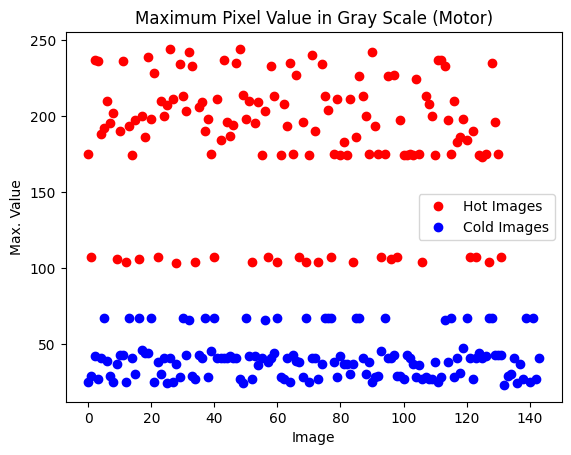

In [ ]:
# Plot train data
plt.figure()
plt.title('Maximum Pixel Value in Gray Scale (Motor)')
plt.plot(X_train[y_train==1],'o',color='red')
plt.plot(X_train[y_train==0],'o',color='blue')
plt.legend(["Hot Images","Cold Images"])
plt.xlabel('Image')
plt.ylabel('Max. Value')
plt.show()

As it is shown in the figure, there is a clear difference between the maximum values of the pixels of the cold and the hot images. In this sense, the classification can be done by setting a linear threshold using SVM

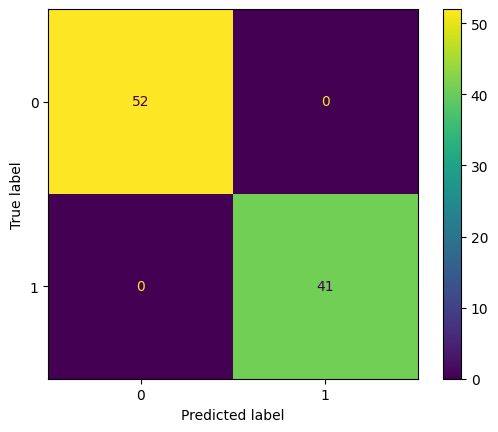

In [ ]:
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
clf = svm.SVC(random_state=0)
clf.fit(X_train.reshape(-1, 1), y_train)
y_pred = clf.predict(X_test.reshape(-1, 1))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

It makes a perfect classification (which is not surprising due to the fact that the classes are quite distant). However, from the plot of the train data it is evident that the data is grouped in more than two subgroups focusing only on the max_value pixel. In this sense, we are going to explore the dataset with KMeans trying to distinguish those subgroups and the number of clusters is going to be determined through the elbow method.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

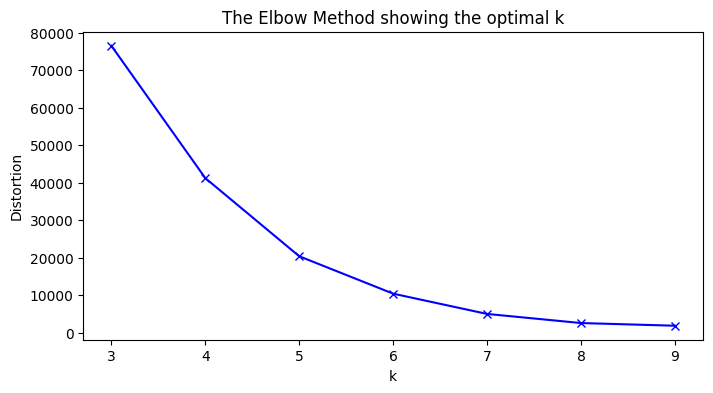

In [ ]:
from sklearn.cluster import KMeans

distortions = []
K = range(3,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=28)
    kmeanModel.fit(X_train.reshape(-1, 1))
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(8,4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

It is evident that for 2 < k < 10 the "elbow" is 5. So the KMeans model will be implemented with k = 5.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-13-6ebd465f700b>:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_kmeans,X_test.reshape(-1, 1), cmap=plt.cm.Set1)


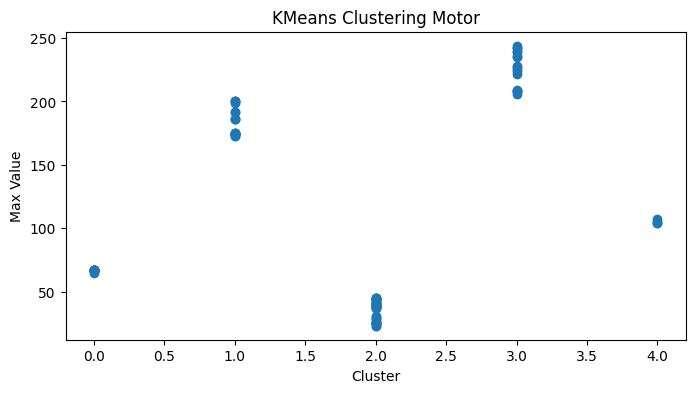

In [ ]:
kmeanModel = KMeans(n_clusters=5)
kmeanModel.fit(X_train.reshape(-1, 1))
y_kmeans = kmeanModel.predict(X_test.reshape(-1, 1))

plt.figure(figsize=(8,4))
plt.scatter(y_kmeans,X_test.reshape(-1, 1), cmap=plt.cm.Set1)
plt.xlabel('Cluster')
plt.ylabel('Max Value')
plt.title('KMeans Clustering Motor')
plt.show()

To find the Region of Interest (RoI), the cluster classification will be added to the dataset and the segmentation parameters will be assigned conveniently according to their cluster classification.

In [ ]:
max_values_for_classification = np.array(dataset_motor['max_value'])
clusters_labels = kmeanModel.predict(max_values_for_classification.reshape(-1, 1))
dataset_motor['clusters'] = clusters_labels
dataset_motor

,filename,image_data_BGR,max_value,min_value,mean_value,std_value,temp_label,label,clusters
0,r057.bmp,"135,1,59,135,1,59,135,1,59,135,1,59,135,1,59,1...",213,24,61.222552,55.725256,1,Rotor-0,3
1,r038.bmp,"126,1,43,126,1,43,126,1,43,126,1,43,126,1,43,1...",200,21,53.324805,51.939685,1,Rotor-0,1
2,r055.bmp,"135,1,59,135,1,59,135,1,59,135,1,59,135,1,59,1...",213,24,61.050365,55.156260,1,Rotor-0,3
3,r050.bmp,"133,1,56,133,1,56,133,1,56,133,1,56,133,1,56,1...",210,23,59.148633,54.656517,1,Rotor-0,3
4,r040.bmp,"126,1,43,126,1,43,126,1,43,126,1,43,126,1,43,1...",200,20,53.563932,52.216708,1,Rotor-0,1
...,...,...,...,...,...,...,...,...,...
364,108.bmp,"94,0,5,94,0,5,94,0,5,94,0,5,94,0,5,94,0,5,94,0...",39,12,15.975573,7.649547,0,A&C&B10,2
365,127.bmp,"94,0,5,94,0,5,94,0,5,94,0,5,94,0,5,94,0,5,94,0...",37,12,15.382044,7.000189,0,A&C&B10,2
366,116.bmp,"94,0,5,94,0,5,94,0,5,94,0,5,94,0,5,94,0,5,94,0...",38,12,15.641836,7.346258,0,A&C&B10,2
367,130.bmp,"94,0,5,94,0,5,94,0,5,94,0,5,94,0,5,94,0,5,94,0...",37,12,15.546198,7.197309,0,A&C&B10,2


Export data to csv


In [ ]:
dataset_motor.to_csv('dataset_motor.csv')

Selection of one image per cluster to draw the final masks

In [ ]:
print(dataset_motor[dataset_motor['filename'] == '200.bmp']['clusters'])
print(dataset_motor[dataset_motor['filename'] == '270.bmp']['clusters'])
print(dataset_motor[dataset_motor['filename'] == '110.bmp']['clusters'])
print(dataset_motor[dataset_motor['filename'] == '315.bmp']['clusters'])
print(dataset_motor[dataset_motor['filename'] == 'f091.bmp']['clusters'])

206    0
Name: clusters, dtype: int32
83    1
Name: clusters, dtype: int32
345    2
Name: clusters, dtype: int32
337    3
Name: clusters, dtype: int32
79    4
Name: clusters, dtype: int32


### **IDENTIFYING RoI (REGION OF INTEREST)**

MANUAL SEGMENTATION

Importation of 5 masks, one for each cluster.

In [ ]:
# Import images
img_315 = cv2.imread('/content/drive/My Drive/IR_Images/Motor/Hot_Images/315.bmp')

# Import masks
manual_mask_315 = cv2.imread('315_mask.bmp')

   It is necesary to convert images from BGR TO RGB in order to make a good visualization of the IR colors

In [ ]:
# RGB images
img_315_rgb = cv2.cvtColor(img_315, cv2.COLOR_BGR2RGB)

# RGB masks
manual_mask_315_rgb = cv2.cvtColor(manual_mask_315, cv2.COLOR_BGR2RGB)

The gray images are also required to create and compare the masks

In [ ]:
# Gray images
img_315_gray = cv2.cvtColor(img_315, cv2.COLOR_BGR2GRAY)

# Gray masks
manual_mask_315_gray = cv2.cvtColor(manual_mask_315, cv2.COLOR_BGR2GRAY)

Image visualization:

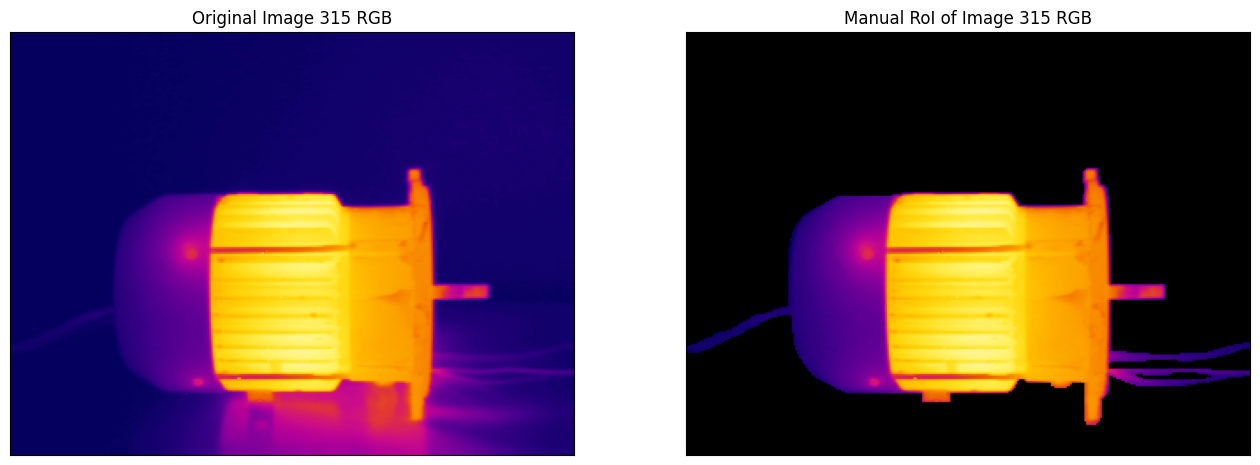

In [ ]:
# Visualize original images vs masks (RGB)

plt.figure(figsize=(16,8)) # Create figure of dimensions 16 x 8

plt.subplot(121) # Locate image
plt.title('Original Image 315 RGB') # Title
plt.imshow(img_315_rgb,cmap='jet') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.subplot(122) # Locate mask
plt.title('Manual RoI of Image 315 RGB') # Title
plt.imshow(manual_mask_315_rgb, cmap='jet') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.show() # Show plot with images

To create the mask (which only has black and white pixels) that we will compare with the automated segmentation, all pixels that have values greater than zero in the gray images will be converted to pixels with values equal t0 255.

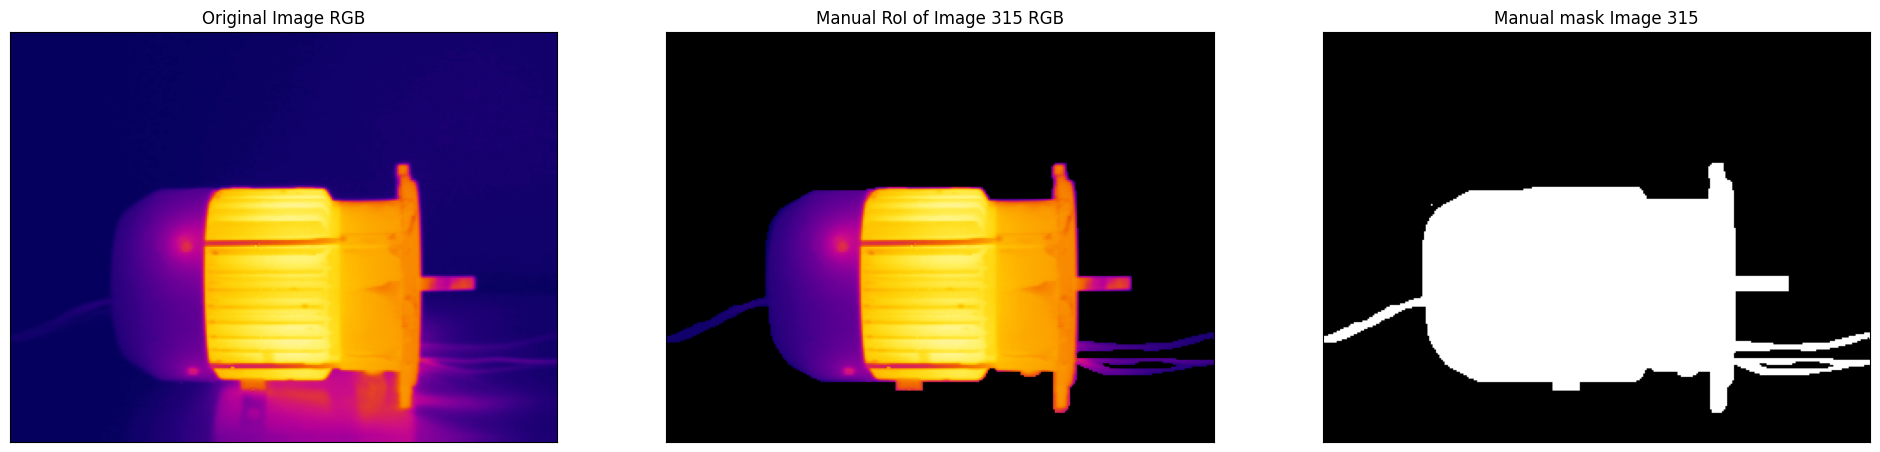

In [ ]:
manual_mask_BnW = manual_mask_315_gray # Take gray scale image
manual_mask_BnW[manual_mask_BnW > 0] = 255 # Convert every non-black pixel to white

# Visualize original images (RGB), Manual RoI (RGB) and black and white masks

plt.figure(figsize=(24,8)) # Create figure of dimensions 24 x 8

plt.subplot(131) # Locate image
plt.title('Original Image RGB') # Title
plt.imshow(img_315_rgb,cmap='jet') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.subplot(132) # Locate mask
plt.title('Manual RoI of Image 315 RGB') # Title
plt.imshow(manual_mask_315_rgb, cmap='jet') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.subplot(133) # Locate mask
plt.title('Manual mask Image 315') # Title
plt.imshow(manual_mask_BnW, cmap='gray') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.show() # Show plot with images


The masks obtained will be the ones that will be compared with those generated by the segmentation generated with computer vision carried out below.

SEGMENTATION USING MACHINE LEARNING AND COMPUTER VISION

The grayscale images will be displayed first:

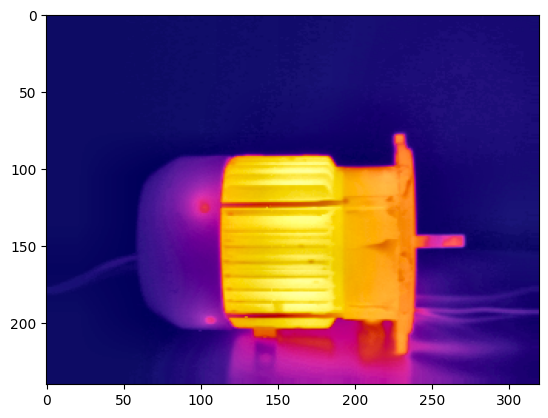

In [ ]:
# converting to LAB color space
lab= cv2.cvtColor(img_315_rgb, cv2.COLOR_BGR2LAB)
l_channel, a, b = cv2.split(lab)

# Applying CLAHE to L-channel
# feel free to try different values for the limit and grid size:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl = clahe.apply(l_channel)

# merge the CLAHE enhanced L-channel with the a and b channel
limg_315_rgb = cv2.merge((cl,a,b))

# Converting image from LAB Color model to BGR color spcae
enhanced_img_315_rgb = cv2.cvtColor(limg_315_rgb, cv2.COLOR_LAB2BGR)

# Stacking the original image with the enhanced image
plt.figure()
plt.imshow(enhanced_img_315_rgb) # Select image
plt.show()

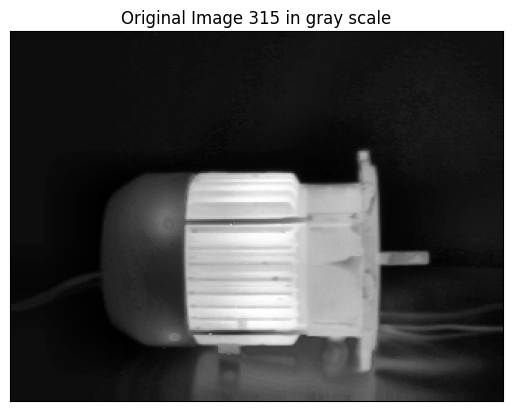

In [ ]:
img_315_gray = cv2.cvtColor(enhanced_img_315_rgb, cv2.COLOR_RGB2GRAY)

plt.figure() # Create figure 
plt.title('Original Image 315 in gray scale') # Title
plt.imshow(img_315_gray,cmap='gray') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis
plt.show() # Show image

It can be observed that although some shadows (region that we want to eliminate) have greater intensity than parts that belong to the region of interest, the sections of the RoI have better defined edges. On the other hand, some cables stand out little or not at all from the background.


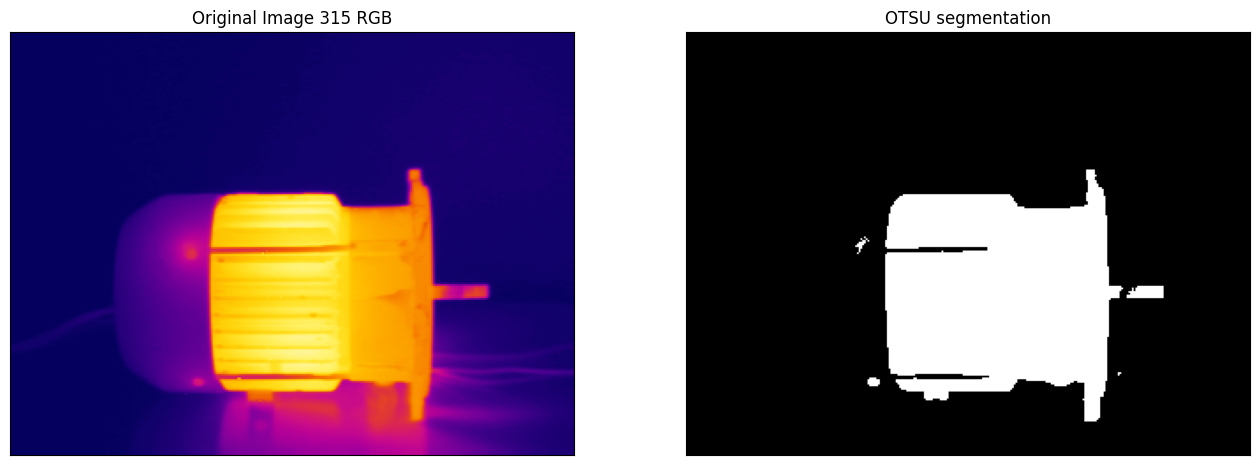

In [ ]:
[_,OTSU] = cv2.threshold(img_315_gray, 0, 255, cv2.THRESH_OTSU)

# Visualize original images vs masks (RGB)

plt.figure(figsize=(16,8)) # Create figure of dimensions 16 x 8

plt.subplot(121) # Locate image
plt.title('Original Image 315 RGB') # Title
plt.imshow(img_315_rgb,cmap='jet') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.subplot(122) # Locate mask
plt.title('OTSU segmentation')
plt.imshow(OTSU, cmap='gray')
plt.xticks([]), plt.yticks([]) # Erase axis

plt.show() # Show plot with images

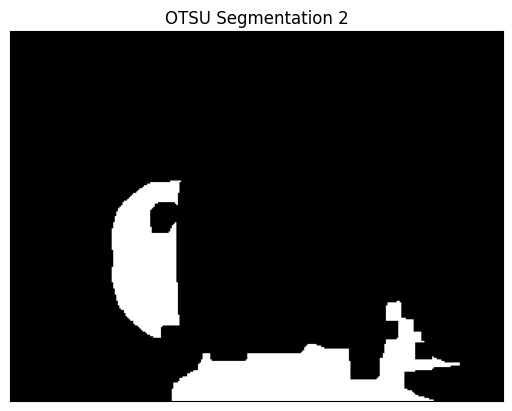

In [ ]:
# OTSU 2

#Create a simple ones kernel
kernel_ones= np.ones((3,3), np.uint8)
 
img_temp = np.copy(img_315_gray)
img_temp[OTSU == 255] = 0
img_temp_erode = cv2.erode(img_temp, kernel_ones, iterations=5)
[_,OTSU2] = cv2.threshold(img_temp_erode, 0, 255, cv2.THRESH_OTSU)

plt.figure()
plt.title('OTSU Segmentation 2')
plt.imshow(OTSU2, cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()

number of objects 3


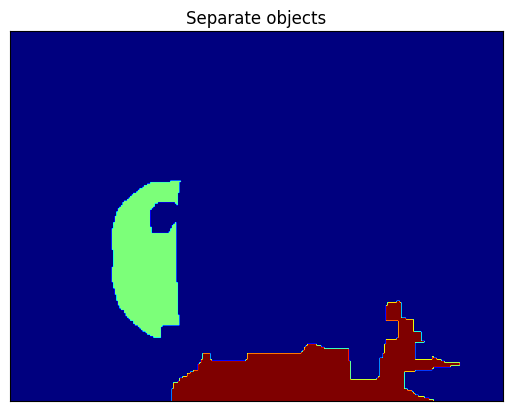

In [ ]:
[cnt, markers] = cv2.connectedComponents(OTSU2)
print("number of objects", cnt)

plt.figure()
plt.title('Separate objects')
plt.imshow(markers,cmap='jet')
plt.xticks([]), plt.yticks([])
plt.show()

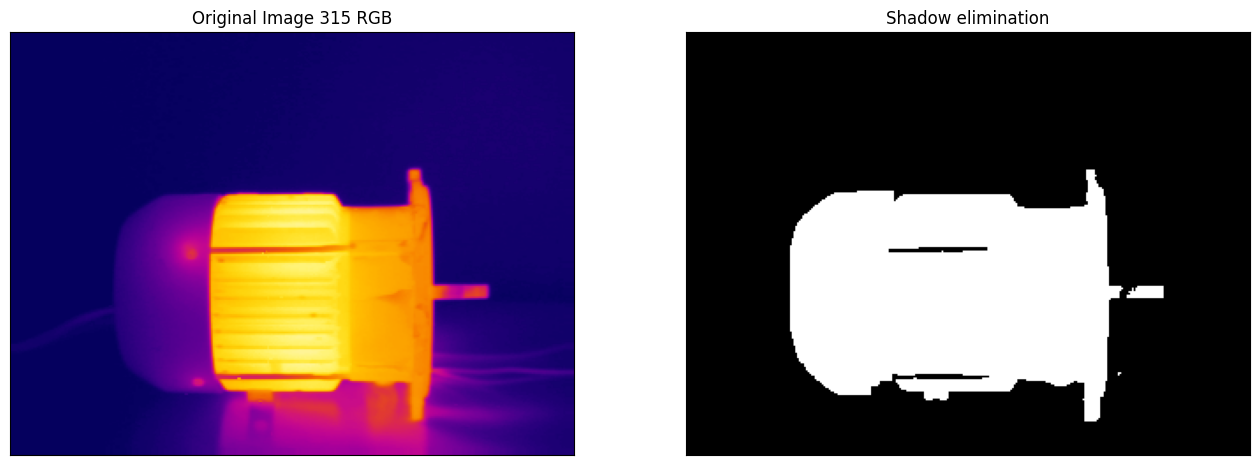

In [ ]:
mask1 = np.uint8(markers==1)
mask1 = cv2.dilate(mask1, kernel_ones, iterations=7)
OTSU[mask1 > 0] = 255
OTSU1 = cv2.dilate(OTSU, kernel_ones, iterations=3)
OTSU1 = cv2.dilate(OTSU, kernel_ones, iterations=3)

plt.figure(figsize=(16,8)) # Create figure of dimensions 16 x 8

plt.subplot(121) # Locate image
plt.title('Original Image 315 RGB') # Title
plt.imshow(img_315_rgb,cmap='jet') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.subplot(122) # Locate mask
plt.title('Shadow elimination')
plt.imshow(OTSU, cmap='gray')
plt.xticks([]), plt.yticks([]) # Erase axis

plt.show() # Show plot with images

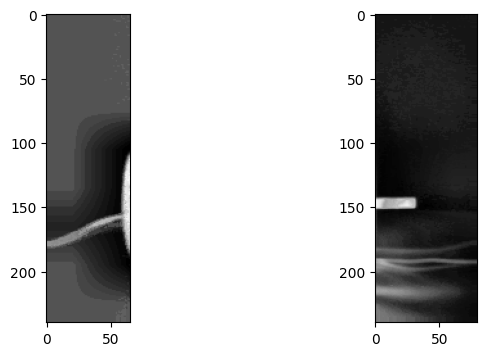

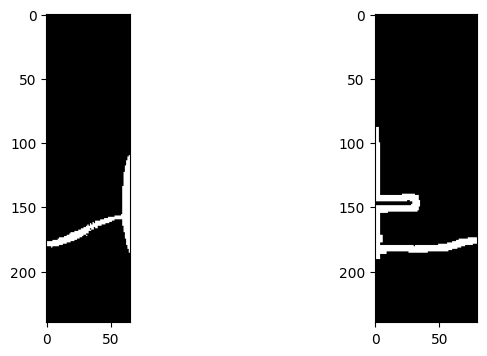

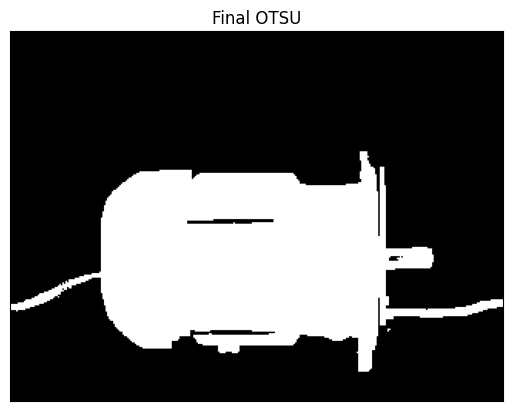

In [ ]:
cables1 = img_315_gray[:,:65]
cables2 = img_315_gray[:,240:]
[_,cables_1_OTSU] = cv2.threshold(cables1, 25, 255, cv2.THRESH_BINARY)
cables_2_OTSU = cv2.dilate(cv2.Canny(cables2,0,255), kernel_ones, iterations=2)
OTSU[:,:65] = cv2.add(OTSU[:,:65],cables_1_OTSU)
OTSU[:,240:] = cv2.add(OTSU[:,240:],cables_2_OTSU)

plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(cables1,cmap='gray')
plt.subplot(122)
plt.imshow(cables2,cmap='gray')
plt.show()

plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(cables_1_OTSU,cmap='gray')
plt.subplot(122)
plt.imshow(cables_2_OTSU,cmap='gray')
plt.show()

plt.figure()
plt.title('Final OTSU')
plt.imshow(OTSU, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()



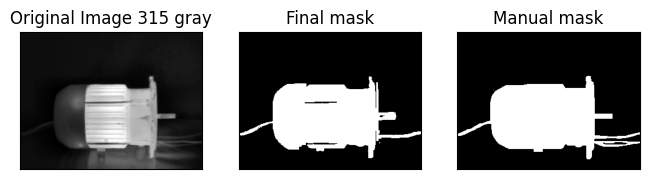

In [ ]:
# Visualize final result vs manual mask

plt.figure(figsize=(8,24)) # Create figure of dimensions 16 x 8

plt.subplot(131) # Locate image
plt.title('Original Image 315 gray') # Title
plt.imshow(img_315_gray,cmap='gray') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.subplot(132) # Locate mask
plt.title('Final mask') # Title
plt.imshow(OTSU, cmap='gray') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.subplot(133) # Locate mask
plt.title('Manual mask') # Title
plt.imshow(manual_mask_BnW, cmap='gray') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.show() # Show plot with images

In [ ]:
from sklearn.metrics import jaccard_score

J = jaccard_score(manual_mask_BnW, OTSU, average='micro')
print("Jaccard score:", J*100, "%")

Jaccard score: 89.37308868501529 %


Next, we introduce functions that generalize the previous steps, starting by the contrast modification in the RGB space and then the definition of the RoI:

In [ ]:
 def increase_contrast_RGB2GRAY(img_rgb):
  # converting to LAB color space
  lab= cv2.cvtColor(img_rgb, cv2.COLOR_BGR2LAB)
  l_channel, a, b = cv2.split(lab)

  # Applying CLAHE to L-channel
  # feel free to try different values for the limit and grid size:
  clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
  cl = clahe.apply(l_channel)

  # merge the CLAHE enhanced L-channel with the a and b channel
  limg_rgb = cv2.merge((cl,a,b))

  # Converting image from LAB Color model to BGR color spcae
  enhanced_img_rgb = cv2.cvtColor(limg_rgb, cv2.COLOR_LAB2BGR)
  img_gray = cv2.cvtColor(enhanced_img_rgb, cv2.COLOR_RGB2GRAY)

  return img_gray

In [ ]:
def find_RoI(img_gray):
  # OTSU 1
  [_,OTSU] = cv2.threshold(img_gray, 0, 255, cv2.THRESH_OTSU) 

  # OTSU 2
  kernel_ones= np.ones((3,3), np.uint8)#Create a simple ones kernel
  img_temp = np.copy(img_gray)
  img_temp[OTSU == 255] = 0
  img_temp_erode = cv2.erode(img_temp, kernel_ones, iterations=5)
  [_,OTSU2] = cv2.threshold(img_temp_erode, 0, 255, cv2.THRESH_OTSU)

  # Separating shadow from object
  [cnt, markers] = cv2.connectedComponents(OTSU2)
  mask1 = np.uint8(markers==1)
  mask1 = cv2.dilate(mask1, kernel_ones, iterations=7)
  OTSU[mask1 > 0] = 255
  OTSU1 = cv2.dilate(OTSU, kernel_ones, iterations=3)
  OTSU1 = cv2.dilate(OTSU, kernel_ones, iterations=3)

  #Adding the cables
  cables1 = img_gray[:,:65]
  cables2 = img_gray[:,240:]
  [_,cables_1_OTSU] = cv2.threshold(cables1, 25, 255, cv2.THRESH_BINARY)
  cables_2_OTSU = cv2.dilate(cv2.Canny(cables2,0,255), kernel_ones, iterations=2)
  OTSU[:,:65] = cv2.add(OTSU[:,:65],cables_1_OTSU)
  OTSU[:,240:] = cv2.add(OTSU[:,240:],cables_2_OTSU)

  return OTSU


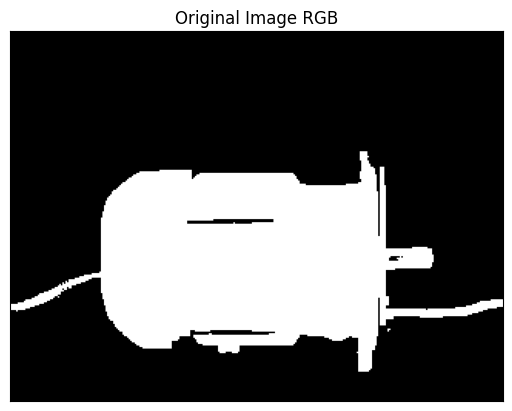

In [ ]:
im_test = find_RoI(increase_contrast_RGB2GRAY(img_315_rgb))
plt.figure()
plt.title('Original Image RGB') # Title
plt.imshow(im_test, cmap='gray') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis
plt.show()

To finish this section, the mask will be tested with different hot images.

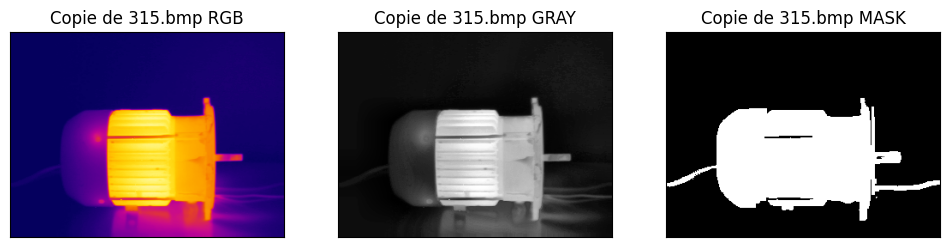

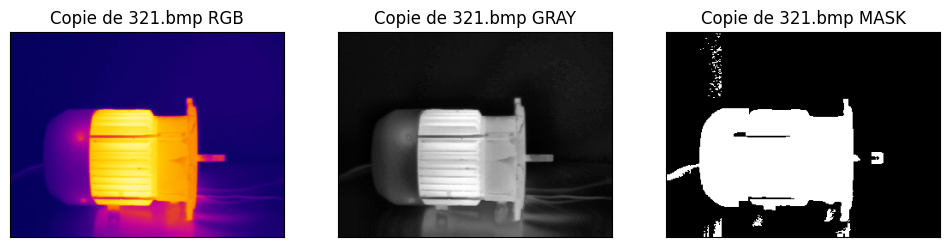

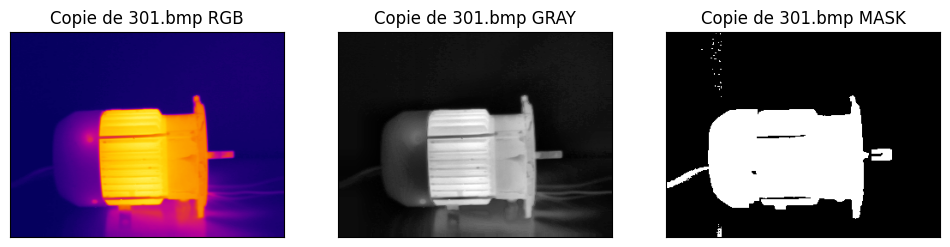

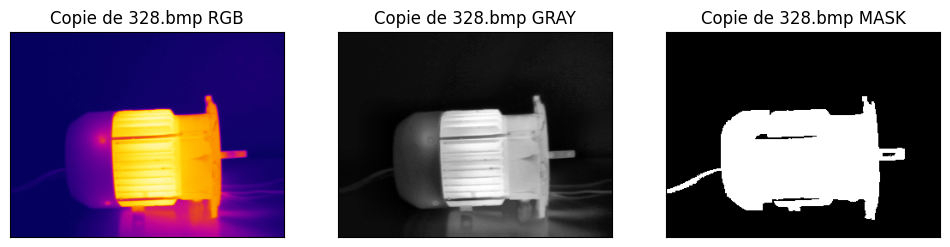

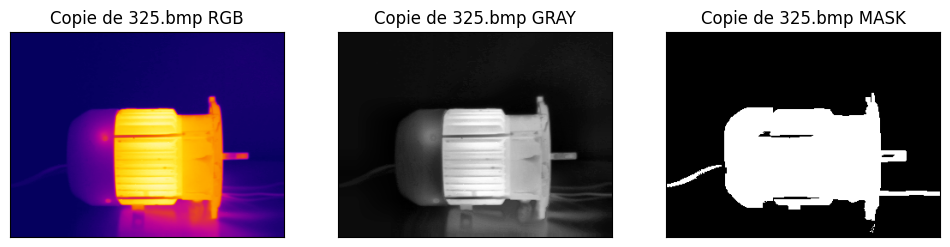

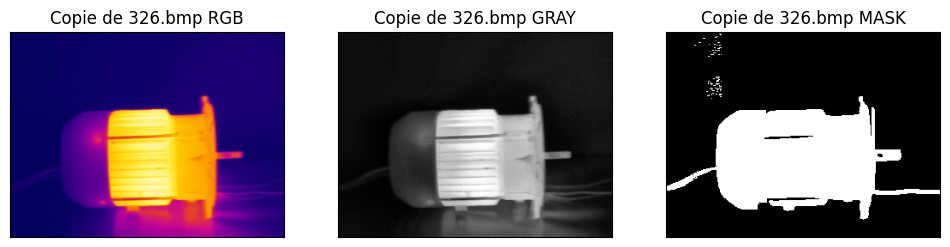

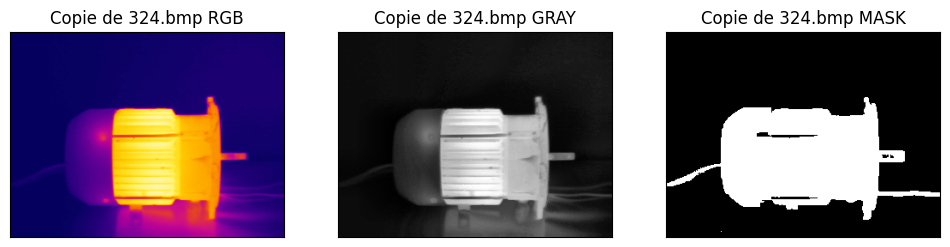

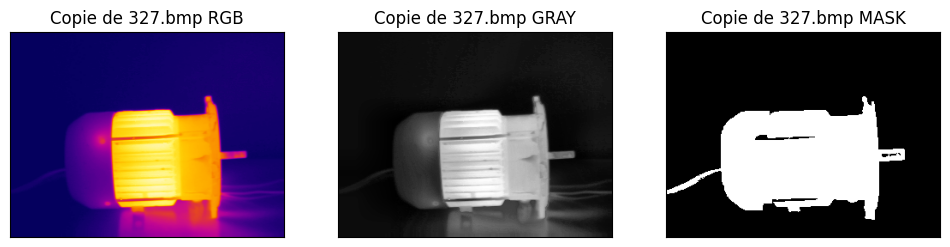

In [ ]:
folder_name = '/content/drive/My Drive/IR_Images/Motor/Test_images'
for filename in os.listdir(folder_name):
        img_rgb = cv2.cvtColor(cv2.imread(f'{folder_name}/{filename}'),cv2.COLOR_BGR2RGB)
        gray_img = increase_contrast_RGB2GRAY(img_rgb)
        mask = find_RoI(gray_img)

        plt.figure(figsize=(12,4))
        plt.subplot(131) # Locate image
        plt.title(f'{filename} RGB') # Title
        plt.imshow(img_rgb) # Select image
        plt.xticks([]), plt.yticks([]) # Erase axis

        plt.subplot(132) # Locate mask
        plt.title(f'{filename} GRAY') # Title
        plt.imshow(gray_img, cmap = 'gray') # Select image
        plt.xticks([]), plt.yticks([]) # Erase axis

        plt.subplot(133) # Locate mask
        plt.title(f'{filename} MASK') # Title
        plt.imshow(mask, cmap = 'gray') # Select image
        plt.xticks([]), plt.yticks([]) # Erase axis
        plt.show()
